# Sentiment Analysis on Amazon Fine Food Reviews using Machine learning in Python


We will be doing some sentiment analysis on Amazon Fine Food Reviews in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

Dataset link: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

# Step 1. Read in Data and import libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [74]:
# Read in data
df = pd.read_csv('/content/Reviews.csv')
print(df.shape)
df = df.head(50) #To show first 50 records
print(df.shape) #To check the number of Rows and Columns in The Dataset

(568454, 10)
(50, 10)


In [75]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [76]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

## Exploratory Data Analysis 

<Axes: title={'center': 'Count of Reviews by Stars'}>

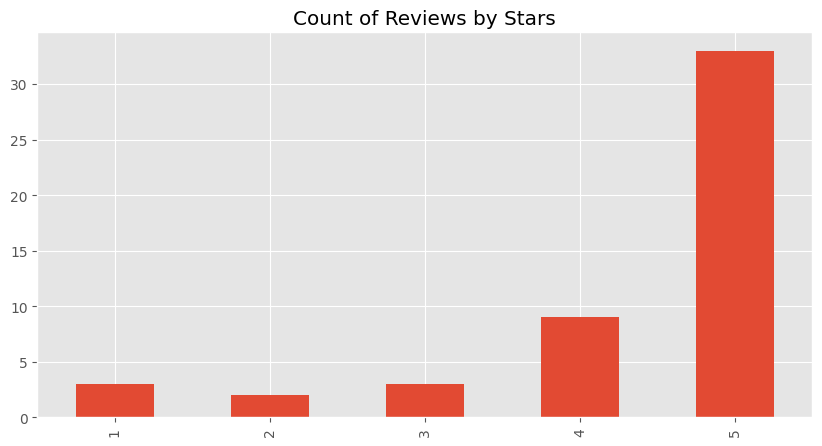

In [77]:
# Lets check the number of unique values present in Score column and the count it
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10,5))

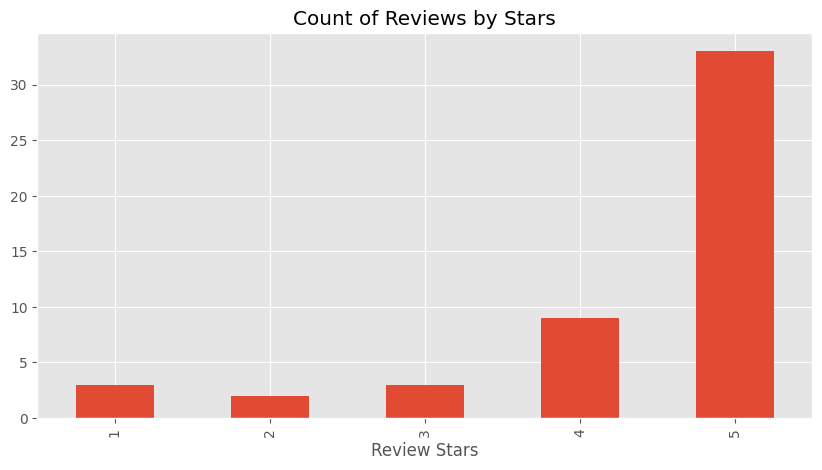

In [78]:
#Modified code to plot the graph
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

**What we get to Know:**
Most of the reviews are 5 Starts but it but then it kind of goes down and it has a little uptake in the number of 1 Star reviews we have.

## NLTK Implementation

In [79]:
example = df['Text'][5]
print(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


In [80]:
# Tokenization-- Splitting the sentence into words by space
nltk.download("all") #Downloading all modules from NLTK
tokens = nltk.word_tokenize(example)
tokens[:10] #showing the first 10 tokens

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [81]:
# Part-of-speech tagging: words related to its Part of Speech
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

In [82]:
# Named entity chunking
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()  # Print the named entities

(S
  I/PRP
  got/VBD
  a/DT
  wild/JJ
  hair/NN
  for/IN
  taffy/NN
  and/CC
  ordered/VBD
  this/DT
  five/CD
  pound/NN
  bag/NN
  ./.
  The/DT
  taffy/NN
  was/VBD
  all/DT
  very/RB
  enjoyable/JJ
  with/IN
  many/JJ
  flavors/NNS
  :/:
  watermelon/NN
  ,/,
  root/NN
  beer/NN
  ,/,
  melon/NN
  ,/,
  peppermint/NN
  ,/,
  grape/NN
  ,/,
  etc/FW
  ./.
  My/PRP$
  only/JJ
  complaint/NN
  is/VBZ
  there/EX
  was/VBD
  a/DT
  bit/NN
  too/RB
  much/JJ
  red/black/NN
  licorice-flavored/JJ
  pieces/NNS
  (/(
  just/RB
  not/RB
  my/PRP$
  particular/JJ
  favorites/NNS
  )/)
  ./.
  Between/IN
  me/PRP
  ,/,
  my/PRP$
  kids/NNS
  ,/,
  and/CC
  my/PRP$
  husband/NN
  ,/,
  this/DT
  lasted/VBN
  only/RB
  two/CD
  weeks/NNS
  !/.
  I/PRP
  would/MD
  recommend/VB
  this/DT
  brand/NN
  of/IN
  taffy/NN
  --/:
  it/PRP
  was/VBD
  a/DT
  delightful/JJ
  treat/NN
  ./.)


# Step 2. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg(negative)/neu(neutral)/pos(positive) scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [83]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer() # Creating an Object of the class

The **SentimentIntensityAnalyzer** class from NLTK's nltk.sentiment module is a pre-trained sentiment analysis tool that can be used to analyze the sentiment (positive, negative, neutral, or compound) of textual data.

The tqdm module is a library for creating progress bars in Python. The notebook module variant is specifically designed for use in Jupyter Notebook or JupyterLab environments.

In [84]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

The polarity_scores method is a function provided by the SentimentIntensityAnalyzer class from NLTK's sentiment module. It is used to calculate sentiment polarity scores for a given text

In [85]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [86]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [87]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

The code is iterating over each row in the DataFrame df and calculating the polarity scores using the SentimentIntensityAnalyzer on the 'Text' column. It stores the results in a dictionary res, where the 'Id' column values are used as keys.

In [88]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [89]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
6,0.029,0.809,0.163,0.8830
7,0.034,0.693,0.273,0.9346
8,0.000,0.520,0.480,0.9487
9,0.000,0.851,0.149,0.6369
10,0.000,0.705,0.295,0.8313


In [90]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [91]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot VADER results

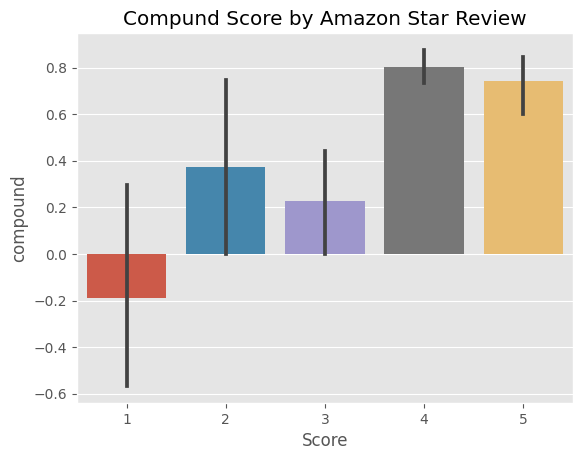

In [92]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

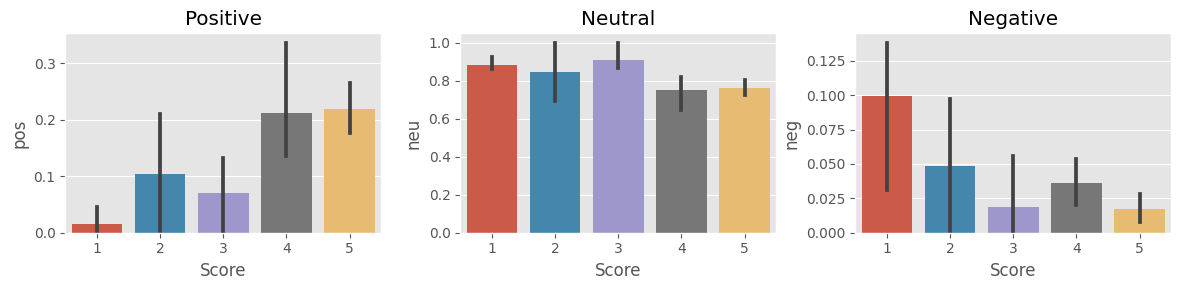

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Draw Back of Vader Model: VADER's scoring is based on a pre-defined lexicon of words and their associated sentiment scores. This lexicon may not capture the full context or subjectivity of certain expressions or phrases, leading to potential inaccuracies in sentiment classification. The model may struggle with sarcasm, irony, or nuanced language that requires deeper understanding.

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [94]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

**AutoTokenizer:** This class from the Transformers library is used to automatically load the appropriate tokenizer for a specific pre-trained model. It simplifies the process of tokenizing input text to prepare it for model input.

**AutoModelForSequenceClassification:** This class is used to automatically load the appropriate pre-trained model for sequence classification. It provides a high-level interface to load and use pre-trained models for classifying sequences of text.

**softmax:** This is a function from the scipy.special module that is used to compute the softmax probabilities. The softmax function normalizes the output logits to produce a probability distribution over multiple classes.



In [96]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

**MODEL:** This variable stores the identifier or name of the pre-trained sentiment analysis model you want to use. In this case, it is set to "cardiffnlp/twitter-roberta-base-sentiment". This model is trained on Twitter data and is based on the Roberta architecture.

**tokenizer:** Using the AutoTokenizer.from_pretrained() method, the tokenizer corresponding to the specified model is loaded. The tokenizer is responsible for converting input text into tokens that the model can process.

model: The AutoModelForSequenceClassification.from_pretrained() method loads the pre-trained model for sequence classification. This model is specifically designed for sentiment analysis tasks, where the input is a sequence of text, and the model predicts the sentiment associated with it.

In [97]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [98]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.006129598, 'roberta_neu': 0.021795882, 'roberta_pos': 0.97207445}


In [99]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [100]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/50 [00:00<?, ?it/s]

In [101]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [102]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Step 3. Combine and compare

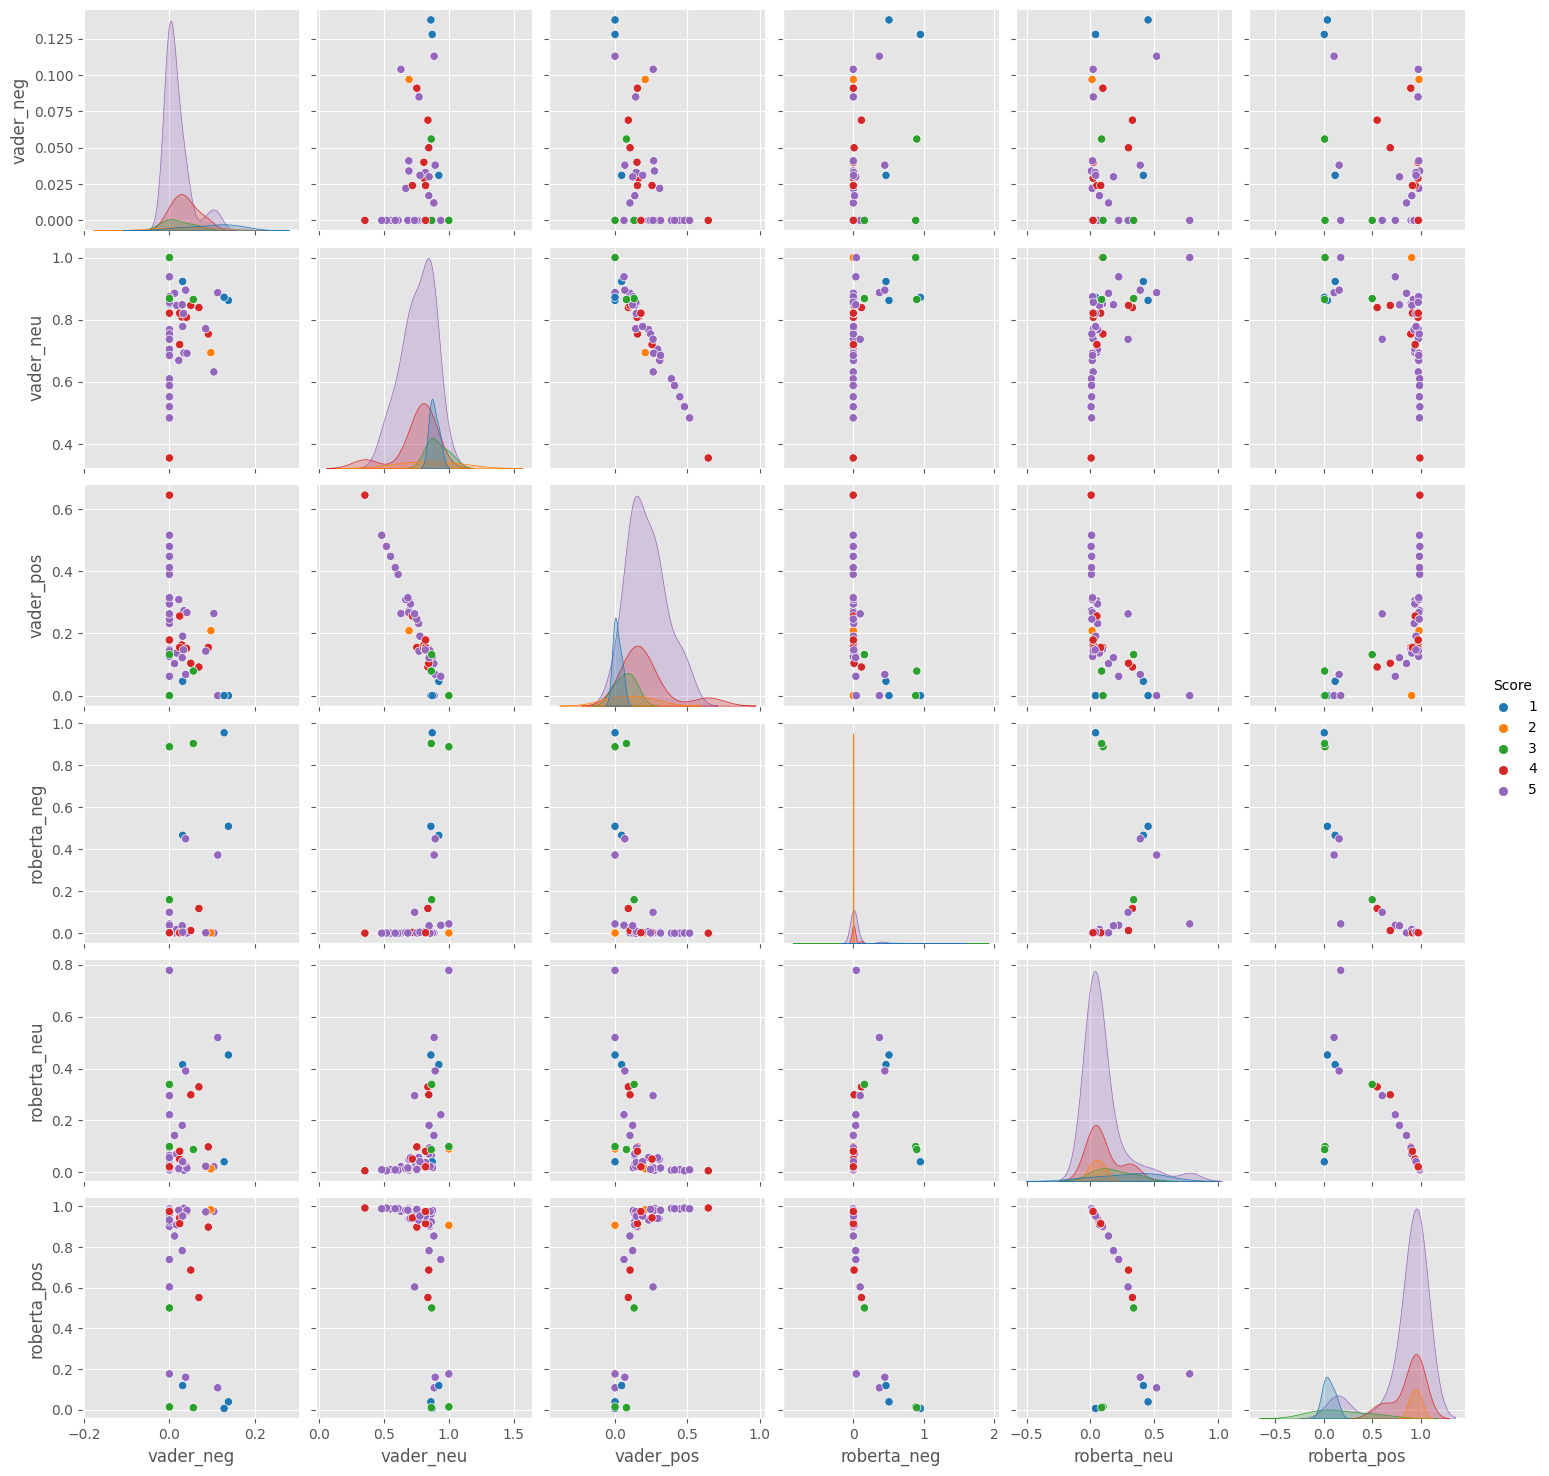

In [103]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [104]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat."

In [105]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat."

In [106]:
# nevative sentiment 5-Star view

In [107]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

"I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."

In [108]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

"One of my boys needed to lose some weight and the other didn't.  I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump.  The higher food sits going stale.  They both really go for this food.  And my chubby boy has been losing about an ounce a week."

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [109]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [110]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [111]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [112]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

# The End